# Noise analysis for ESP32 using BC547B NPN transistor as an amplifier

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

The following three data files contain 300,000 readings each (250 readings per second over 20 minutes)

## Importing the data

In [22]:
# During base source data the inputs were connected to the signal source through two separate lowpass filters.
# One filter for each input. The output signal maintains the same level throughout the experiment.
# The purpose of this file is to determine how the filters affect the readings
# This should be compensated for when analysing transistor data
base_source_data = pd.read_csv("../output/base_2.csv", sep=", ")
print(base_source_data.shape)
base_source_data.head()

C:\Users\noskn\AppData\Local\Temp\ipykernel_22012\2047634959.py:5: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  base_source_data = pd.read_csv("../output/base_2.csv", sep=", ")


(300006, 3)


,time,value,value2
0,10780120,2289,2559
1,10780124,2286,2550
2,10780128,2287,2551
3,10780132,2288,2554
4,10780136,2287,2553


In [23]:
# In transistor data, the column "value" was measured at the base of the transistor
# meaning it measures the transistor base voltage
# "value2" was measured at the collector of the transistor
# meaning it measures the transistor collector voltage
transistor_data = pd.read_csv("../output/transistor_5.csv", sep=", ")
print(transistor_data.shape)
transistor_data.head()

C:\Users\noskn\AppData\Local\Temp\ipykernel_22012\3690541358.py:5: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  transistor_data = pd.read_csv("../output/transistor_5.csv", sep=", ")


(300004, 3)


,time,value,value2
0,6952172,754,3334
1,6952176,756,3341
2,6952180,761,3343
3,6952184,752,3331
4,6952188,756,3339


In [24]:
# In transistor reverse data, everything is the same
# except the physical input connections are swapped
# so that "value" is measured at the collector
# and "value2" is measured at the base
# The purpose of this is to compare the two measurements
# to see if the inputs, and by extension the filters, behave differently at different voltage levels
# and thus determine if this must be accounted for
transistor_reverse_data = pd.read_csv("../output/transistor_reverse_5.csv", sep=", ")
print(transistor_reverse_data.shape)
transistor_reverse_data.head()

C:\Users\noskn\AppData\Local\Temp\ipykernel_22012\3458765456.py:8: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  transistor_reverse_data = pd.read_csv("../output/transistor_reverse_5.csv", sep=", ")


(300006, 3)


,time,value,value2
0,8283500,3197,937
1,8283504,3199,939
2,8283508,3188,929
3,8283512,3191,931
4,8283516,3195,931


## Clean the source data

### Time axis

<AxesSubplot: ylabel='time'>

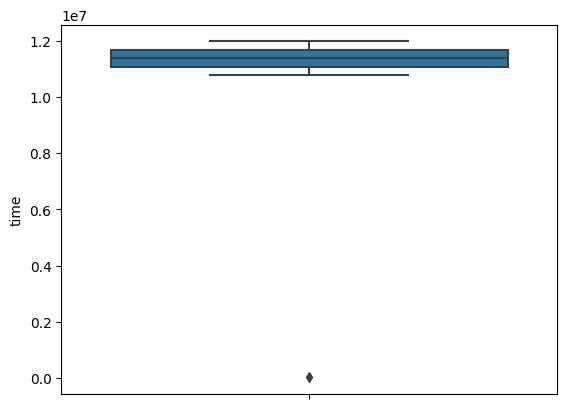

In [25]:
sns.boxplot(y="time", data=base_source_data)

<AxesSubplot: ylabel='time'>

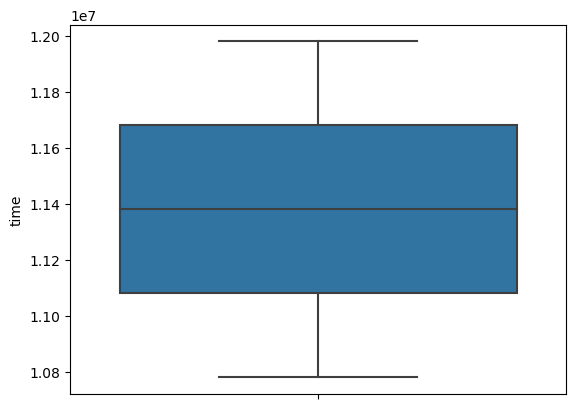

In [26]:
# Remove the outlier and plot again
base_source_data.drop(np.argmin(base_source_data["time"]), inplace=True)
sns.boxplot(y="time", data=base_source_data)

### Value 1

<AxesSubplot: ylabel='value'>

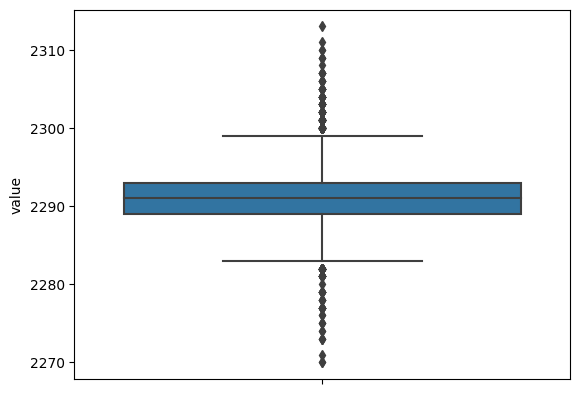

In [27]:
sns.boxplot(y="value", data=base_source_data)

There are some outliers, however none such as they would constitute a transmission error. They are likely caused by power fluctuations in the power supply (my computer) or other external factors. We plot the data to determine if this is orth acocunting for.

<AxesSubplot: xlabel='time', ylabel='value'>

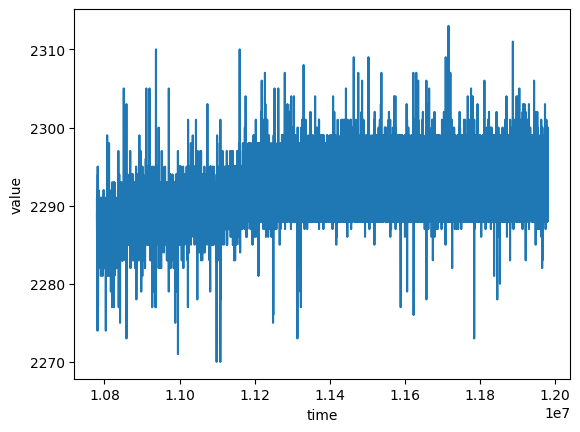

In [28]:
sns.lineplot(x="time", y="value", data=base_source_data)

While these spikes are geniune datapoints, addressing these spikes is not currently a priority. We will remove them from the dataset, and prioritize the more regular input noise.

<AxesSubplot: xlabel='time', ylabel='value'>

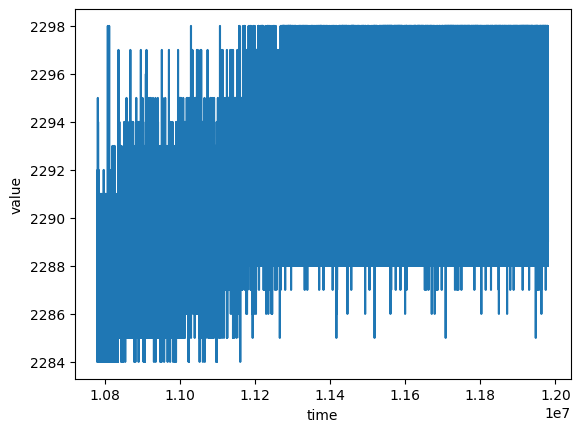

In [30]:
base_source_data = base_source_data.query("value < value.quantile(.999)")
base_source_data = base_source_data.query("value > value.quantile(.001)")
sns.lineplot(x="time", y="value", data=base_source_data)

<AxesSubplot: ylabel='value'>

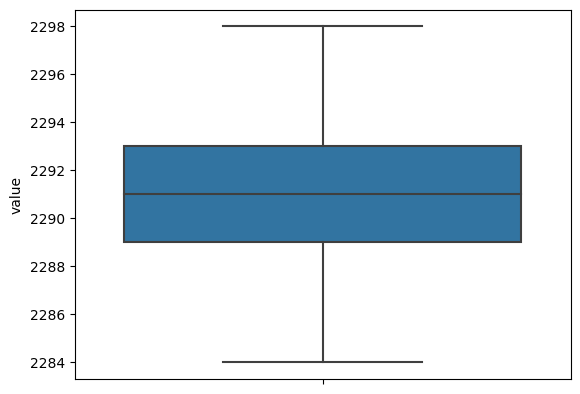

In [31]:
sns.boxplot(y="value", data=base_source_data)

### Value 2

<AxesSubplot: ylabel='value2'>

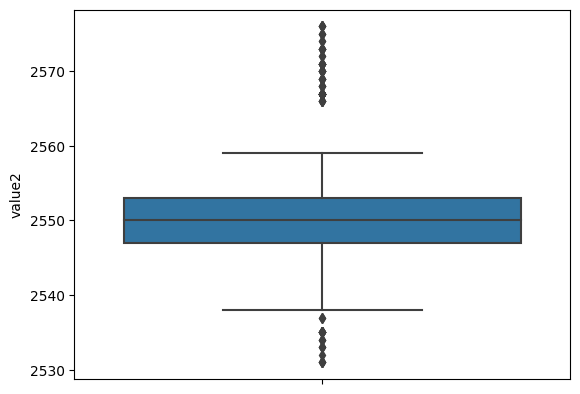

In [79]:
sns.boxplot(y="value2", data=base_source_data)

The same applies to this as for the previous value. We keep the outliers in the dataset.

## Clean the transistor data

### Time axis

<AxesSubplot: ylabel='time'>

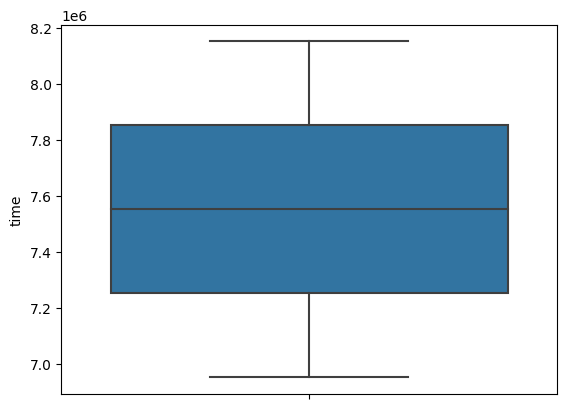

In [80]:
sns.boxplot(y="time", data=transistor_data)

The time axis has no outliers for this dataset

### Value 1

<AxesSubplot: ylabel='value'>

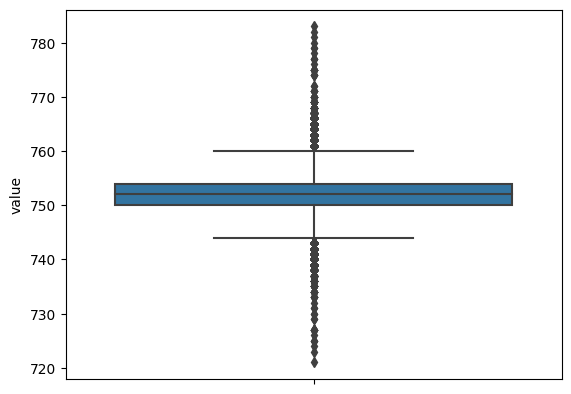

In [81]:
sns.boxplot(y="value", data=transistor_data)

There are many outliers. This is indicative of few extreme spikes. We visualize the dataset to determine the source of the outliers. 

<AxesSubplot: xlabel='time', ylabel='value'>

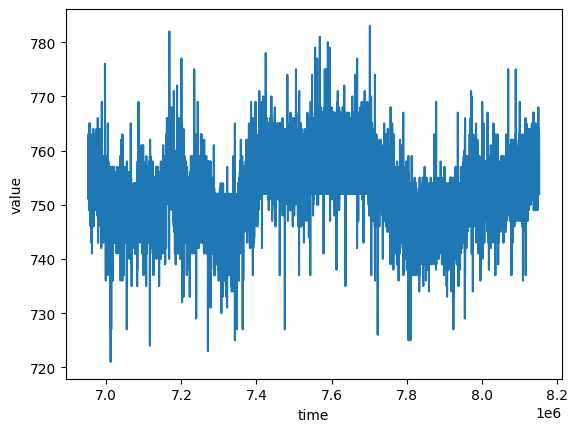

In [98]:
sns.lineplot(x="time", y="value", data=transistor_data)

### Value 2

<AxesSubplot: ylabel='value2'>

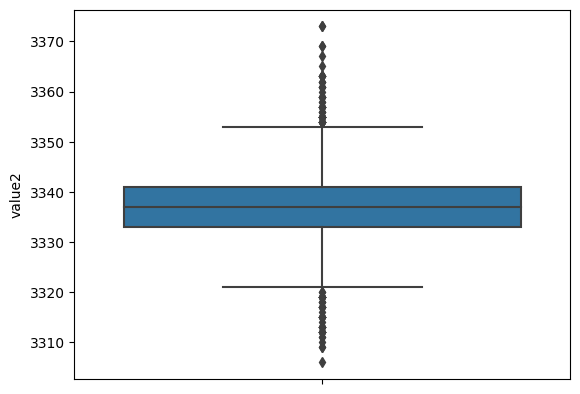

In [82]:
sns.boxplot(y="value2", data=transistor_data)

As with value 1 there are many outliers. We keep them in the dataset.

## Clean the transistor reverse data

### Time axis

<AxesSubplot: ylabel='time'>

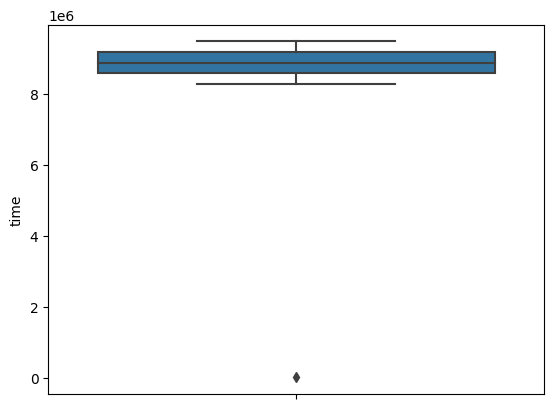

In [83]:
sns.boxplot(y="time", data=transistor_reverse_data)

<AxesSubplot: ylabel='time'>

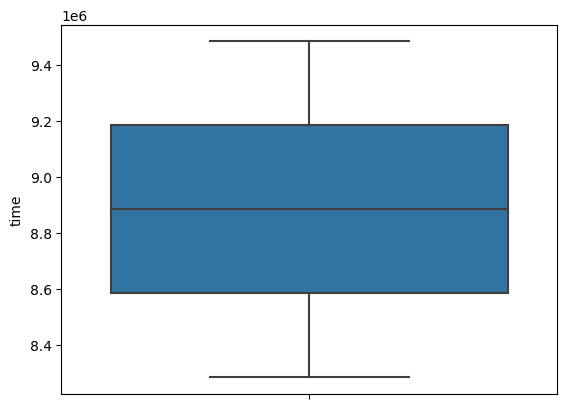

In [84]:
# Remove the outlier and plot again
transistor_reverse_data.drop(np.argmin(transistor_reverse_data["time"]), inplace=True)
sns.boxplot(y="time", data=transistor_reverse_data)

### Value 1

<AxesSubplot: ylabel='value'>

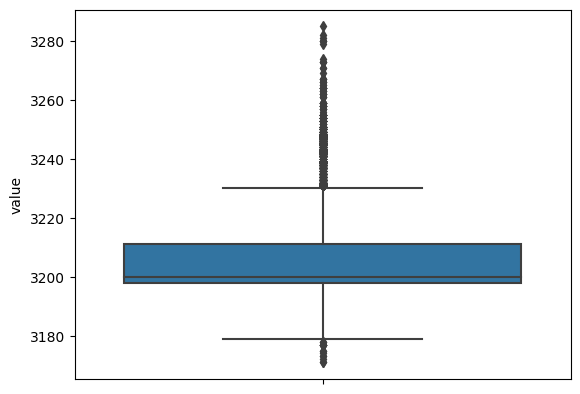

In [85]:
sns.boxplot(y="value", data=transistor_reverse_data)

This mirrors the non-reversed transistor values. We keep the outliers.

### Value 2

<AxesSubplot: ylabel='value2'>

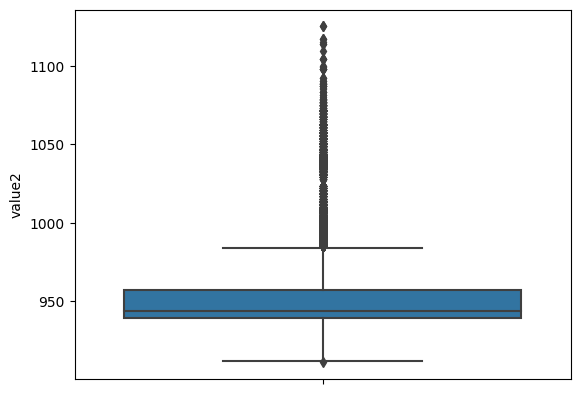

In [86]:
sns.boxplot(y="value2", data=transistor_reverse_data)

This mirrors the non-reversed transistor values. We keep the outliers.

## Plot the source data

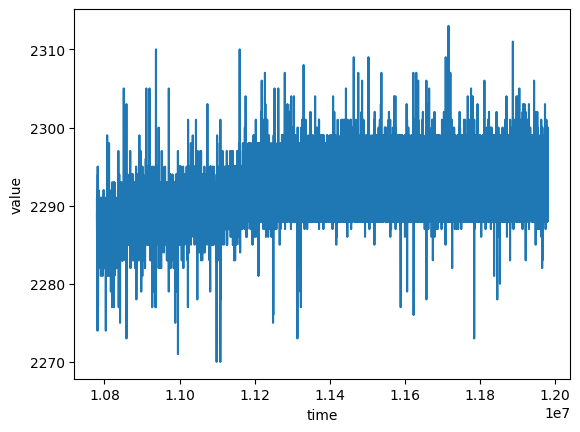

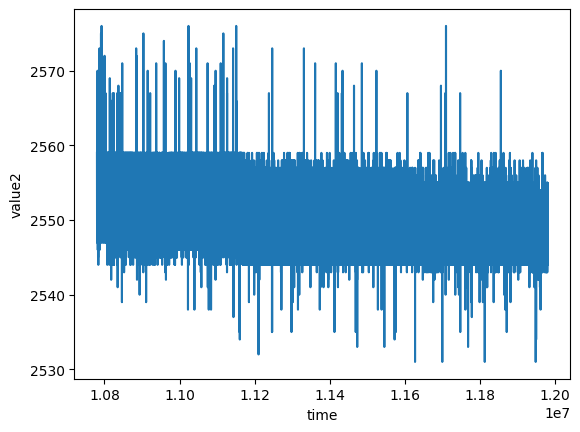